<a href="https://colab.research.google.com/github/Atefeh62/data-analyzing-using-python/blob/main/visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#import the needed libraries
import pandas as pd
import requests
import io

In [5]:
#getting the dataset and making it as a dataframe and showing the first 5 rows
data = requests.get('https://opendata.utah.gov/resource/ezpq-caqa.csv').content
df = pd.read_csv(io.StringIO(data.decode("utf-8")))
df.head()

,case,offense_code,offense_description,report_date,occ_date,day_of_week,location,location_1
0,SL2012158889,1305-0,ASSAULT,2012-09-09T18:54:00.000,2012-09-09T18:54:00.000,1,"1400 W 400 S\nSalt lake City, Utah \n(40.76066...","1400 W 400 S\nSalt lake City, Utah \n(40.76066..."
1,SL2012180471,1313-0,ASSAULT,2012-10-15T04:23:00.000,2012-10-15T04:23:00.000,2,"600 W 300 S\nSalt lake City, Utah \n(40.775877...","600 W 300 S\nSalt lake City, Utah \n(40.775877..."
2,SL201230598,1313-0,ASSAULT,2012-02-23T00:28:00.000,2012-02-23T00:00:00.000,5,"200 S RIO GRANDE ST\nSalt lake City, Utah \n(4...","200 S RIO GRANDE ST\nSalt lake City, Utah \n(4..."
3,SL201231890,1311-0,ASSAULT,2012-02-24T22:44:00.000,2012-02-24T22:44:00.000,6,"200 S RIO GRANDE ST\nSalt lake City, Utah \n(4...","200 S RIO GRANDE ST\nSalt lake City, Utah \n(4..."
4,SL201212255,1313-0,ASSAULT,2012-01-21T22:53:00.000,2012-01-21T22:53:00.000,7,"400 S 400 W\nSalt lake City, Utah \n(40.760572...","400 S 400 W\nSalt lake City, Utah \n(40.760572..."


In [6]:
#the columns are 8 we want to know how many rows are in our dataset
df.shape[0]

1000

In [32]:
#organazint the dataset by date
dfsorted=df.sort_values(by= 'report_date')
dfsorted.head()

,case,offense_code,offense_description,report_date,occ_date,day_of_week,location,location_1
130,SL2012157,1302-0,ASSAULT,2012-01-01 03:39:00,2012-01-01T03:39:00.000,1,"1000 S CONCORD ST\nSalt lake City, Utah \n(40....","1000 S CONCORD ST\nSalt lake City, Utah \n(40...."
137,SL2012340,1313-0,ASSAULT,2012-01-01 14:44:00,2012-01-01T05:00:00.000,1,"1300 N GENERAL DR\nSalt lake City, Utah \n(40....","1300 N GENERAL DR\nSalt lake City, Utah \n(40...."
514,SL20121035,1313-0,ASSAULT,2012-01-02 22:37:00,2012-01-02T22:37:00.000,2,"700 N OAKLEY ST\nSalt lake City, Utah \n(40.78...","700 N OAKLEY ST\nSalt lake City, Utah \n(40.78..."
356,SL20121038,1313-0,ASSAULT,2012-01-02 22:58:00,2012-01-02T22:58:00.000,2,"900 S MAIN ST\nSalt lake City, Utah \n(40.7496...","900 S MAIN ST\nSalt lake City, Utah \n(40.7496..."
133,SL20121708,1316-3,ASSAULT,2012-01-04 09:27:00,2012-01-04T08:15:00.000,4,"300 E 300 S\nSalt lake City, Utah \n(40.762805...","300 E 300 S\nSalt lake City, Utah \n(40.762805..."


In [33]:
#to see is there any duplicated row
dfsorted.duplicated().sum()

0

In [34]:
#to see is there any missing data (not a value)
dfsorted.isna().sum()

case                   0
offense_code           0
offense_description    0
report_date            0
occ_date               0
day_of_week            0
location               0
location_1             0
dtype: int64

In [39]:
#data seems to be clean so we start analysing
#in which moth of the year crime rate is higher?
#first we covert the report_date column to date format
dfsorted['report_date'] = pd.to_datetime(dfsorted['report_date'])
#now we group by the df by month
months = dfsorted.groupby(dfsorted['report_date'].dt.strftime('%B'))['location'].count()
months

report_date
April         87
August        88
December      74
February      72
January       53
July          92
June          91
March         92
May           83
November      71
October       96
September    101
Name: location, dtype: int64

In [40]:
#now we see that the highest crime happened in september, october, july and march.
#to visual my observation, I tried to use the above result and make a dataframe by it, but it won't recognise report_date as it sits in index place, 
#I made a list of monthes to order the barplot by the desired result, 
#which I really didn't like . so I will keep finding in a solution that can lead me to a stright forward way to visualize the results

mdf=pd.DataFrame(months)

mdf.rename(columns = {'report_date':'month', 'location':'total_month_crime'}, inplace = True)
mdf

,total_month_crime
report_date,
April,87
August,88
December,74
February,72
January,53
July,92
June,91
March,92
May,83


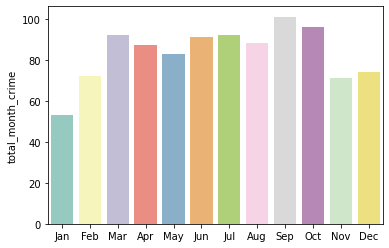

In [46]:
import seaborn as sns
M=['Apr','Aug','Dec','Feb','Jan','Jul','Jun','Mar','May','Nov','Oct','Sep']
mor=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
sns.barplot(x= M ,y='total_month_crime',data=mdf, order = mor, palette='Set3')

